L'angle de Brewster pour un matériau d'indice de n= 2.1  vaut 64.70750321478448


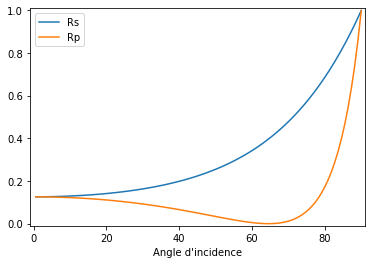

In [31]:
import numpy as np
%matplotlib inline
import math as m
import matplotlib.pyplot as plt

Dim = 100
theta = np.linspace(0.01, np.pi/2, Dim)

n_transm =2.1  # indice de réfraction du milieu de transmission
n_incid = 1.0    # indice de réfraction du milieu incident

#Loi de Snell Descatres de la réfraction pour calculer l'angle réfracté (en radian)
def Refraction(angle,indice1,indice2):  # Application de la loi de Snell-Descartes (angles en rad)
    return np.arcsin(indice1/indice2*np.sin(angle))

#Calcul des coefficients de Fresnel en réflexion pour une polarisation "s" et "p"
def Fresnelcoef(n_transm,n_incid, theta):
    r_p = (n_transm*np.cos(theta)-n_incid*np.cos(Refraction(theta,n_incid,n_transm))) \
       / (n_transm*np.cos(theta)+n_incid*np.cos(Refraction(theta,n_incid,n_transm)))
    r_s = (n_incid*np.cos(theta)-n_transm*np.cos(Refraction(theta,n_incid,n_transm))) \
       / (n_incid*np.cos(theta)+n_transm*np.cos(Refraction(theta,n_incid,n_transm)))
    return r_s, r_p


modeleR =  np.abs(Fresnelcoef(n_transm, n_incid , theta))**2

plt.axis([-1,91,-.01,1.01])
plt.plot(np.degrees(theta), modeleR[0])
plt.plot(np.degrees(theta), modeleR[1])
plt.xlabel("Angle d'incidence")
plt.legend(["Rs", "Rp"])

#L'angle de Brewster correspond à l'angle pour lequel l'intensité de la lumière de polarisation "p" 
# s'annule lors de la réflexion sur un diélectrique
min_index = np.argmin(modeleR[1])
print("L'angle de Brewster pour un matériau d'indice de n=",n_transm,' vaut', np.degrees(theta[min_index]))


Réflexion de la lumière sur un film d'épaisseur d et avec un angle d'incidence $\theta_0$

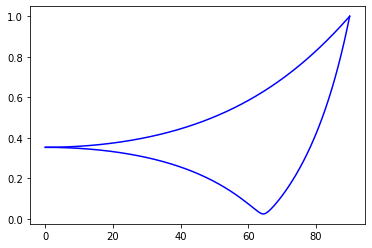

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

n_incident = 1.0 - 0.0j
n_couche = 1.33 - 0.0j
n_substrat = 2.1 + 0.0j

def Refraction(angle,indice1,indice2):  # Application de la loi de Snell-Descartes (angles en rad)
    return np.arcsin(indice1/indice2*np.sin(angle))
    
def CoucheMince(N0, N1, N2, theta, d, longW):
    r01 = Fresnelcoef(N1,N0, theta)
    r12 = Fresnelcoef(N2,N1, Refraction(theta,N0,N1))
    beta = 2*np.pi*d/longW*np.sqrt(N1**2-N0**2*np.sin(theta)**2)
    r012s = (r01[0]+r12[0]*np.exp(-2.0j*beta))/(1+r01[0]*r12[0]*np.exp(-2.0j*beta))
    r012p = (r01[1]+r12[1]*np.exp(-2.0j*beta))/(1+r01[1]*r12[1]*np.exp(-2.0j*beta))
    return r012s, r012p
    
    
angles = np.linspace(np.deg2rad(0),np.deg2rad(90),500)
longW = 658 #nm
epaisseur = 10 #nm

test= CoucheMince(n_incident, n_couche, n_substrat, angles, epaisseur, longW)

plt.plot(np.degrees(angles), np.abs(test[0]),"-b", label="|r012s|")
plt.plot(np.degrees(angles), np.abs(test[1]),"-b", label="|r012p|")


Text(0, 0.5, '$\\Psi$')

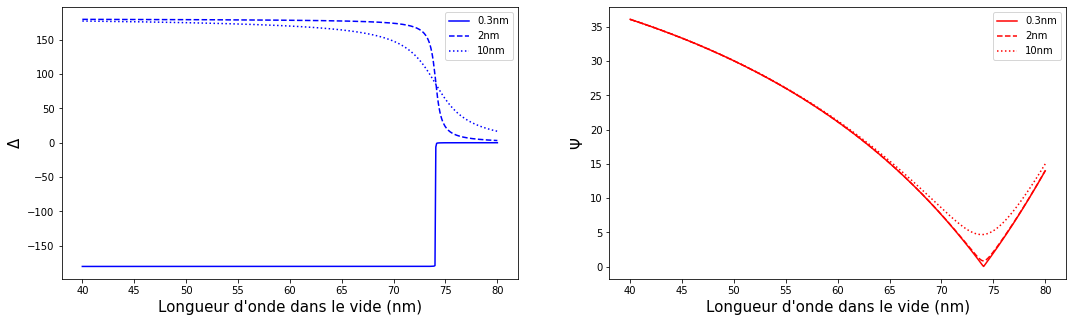

In [24]:
n_incident = 1.0-0.0j
n_couche = 1.48 - 0.0j
n_substrat = 3.5 + 0.014j

def Refraction(angle,indice1,indice2):  # Application de la loi de Snell-Descartes (angles en rad)
    return np.arcsin(indice1/indice2*np.sin(angle))

def Fresnelcoef(n_transm,n_incid, theta):
    r_p = (n_transm*np.cos(theta)-n_incid*np.cos(Refraction(theta,n_incid,n_transm))) \
       / (n_transm*np.cos(theta)+n_incid*np.cos(Refraction(theta,n_incid,n_transm)))
    r_s = (n_incid*np.cos(theta)-n_transm*np.cos(Refraction(theta,n_incid,n_transm))) \
       / (n_incid*np.cos(theta)+n_transm*np.cos(Refraction(theta,n_incid,n_transm)))
    return r_s, r_p

def CoucheMince(N0, N1, N2, theta, d, longW):
    r01 = Fresnelcoef(N1,N0, theta)
    r12 = Fresnelcoef(N2,N1, Refraction(theta,N0,N1))
    beta = 2*np.pi*d/longW*np.sqrt(N1**2-N0**2*np.sin(theta)**2)
    r012s = (r01[0]+r12[0]*np.exp(-2j*beta))/(1+r01[0]*r12[0]*np.exp(-2j*beta))
    r012p = (r01[1]+r12[1]*np.exp(-2j*beta))/(1+r01[1]*r12[1]*np.exp(-2j*beta))
    return r012s, r012p

angles = np.linspace(np.deg2rad(40),np.deg2rad(80),500)
longW = 658 #nm

epais_Ox_1 = CoucheMince(n_incident, n_couche, n_substrat, angles, 0.25, longW)
epais_Ox_2 = CoucheMince(n_incident, n_couche, n_substrat, angles, 2.0, longW)
epais_Ox_3 = CoucheMince(n_incident, n_couche, n_substrat, angles, 10.0, longW)

psy1 = np.arctan2(np.abs(epais_Ox_1[1]),np.abs(epais_Ox_1[0]))
delta1 = np.angle(epais_Ox_1[1]/epais_Ox_1[0])

psy2 = np.arctan2(np.abs(epais_Ox_2[1]),np.abs(epais_Ox_2[0]))
delta2 = np.angle(epais_Ox_2[1]/epais_Ox_2[0])

psy3 = np.arctan2(np.abs(epais_Ox_3[1]),np.abs(epais_Ox_3[0]))
delta3 = np.angle(epais_Ox_3[1]/epais_Ox_3[0])

plt.rcParams['figure.figsize'] = [18, 5]
plt.subplot(1,2,1)
plt.plot(np.degrees(angles), np.degrees(delta1),"-b", label="0.3nm")
plt.plot(np.degrees(angles), np.degrees(delta2),"--b", label="2nm")
plt.plot(np.degrees(angles), np.degrees(delta3),":b", label="10nm")
plt.legend()
#plt.title('Mesure ellipsométrique')
plt.xlabel("Longueur d'onde dans le vide (nm)", fontsize=15)
plt.ylabel('$\Delta$', fontsize=15)

plt.subplot(1,2,2)
plt.plot(np.degrees(angles), np.degrees(psy1),'-r', label="0.3nm")
plt.plot(np.degrees(angles), np.degrees(psy2),"--r", label="2nm")
plt.plot(np.degrees(angles), np.degrees(psy3),":r", label="10nm")
plt.legend()
plt.xlabel("Longueur d'onde dans le vide (nm)", fontsize=15)
plt.ylabel('$\Psi$', fontsize=15)

In [25]:
import numpy as np
import matplotlib.pyplot as plt
with open("ModSiO2-2nmSi.clc", "r") as fileData:
    x = list()
    y = list()
    z = list()
    for line in fileData:
        if "#" in line:
            # on saute la ligne
            continue
        data = line.split()
        x.append(float(data[0]))
        y.append(float(data[2]))
        z.append(float(data[3]))
    LongW_JY = np.array(x, dtype=float)
    Psi_JY = np.array(y, dtype=float)
    Delta_JY = np.array(z, dtype=float)

Text(0, 0.5, '$\\Psi$')

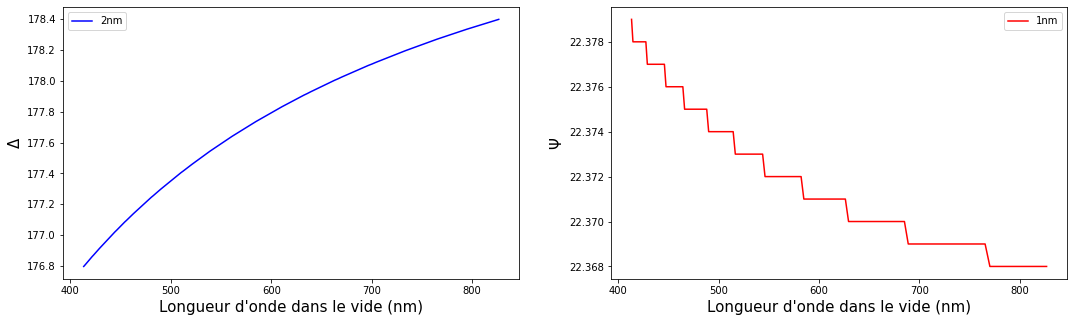

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [18, 5]
plt.subplot(1,2,1)
plt.plot(LongW_JY, Delta_JY,"-b", label="2nm")
plt.legend()
#plt.title('Mesure ellipsométrique')
plt.xlabel("Longueur d'onde dans le vide (nm)", fontsize=15)
plt.ylabel('$\Delta$', fontsize=15)

plt.subplot(1,2,2)
plt.plot(LongW_JY, Psi_JY,'-r', label="1nm")

plt.legend()
plt.xlabel("Longueur d'onde dans le vide (nm)", fontsize=15)
plt.ylabel('$\Psi$', fontsize=15)

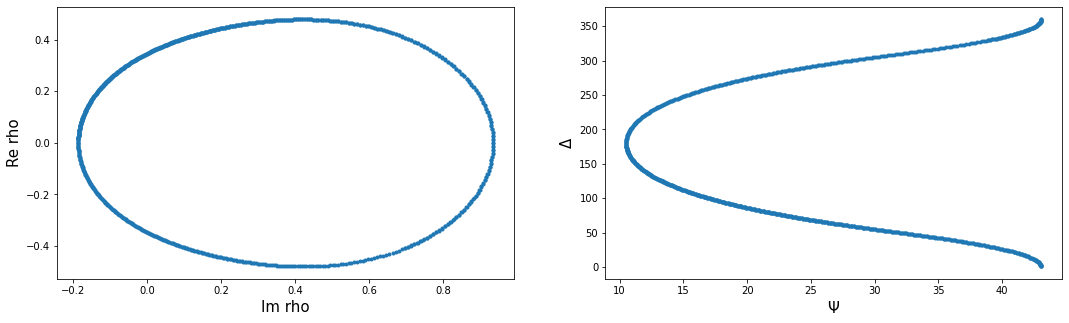

In [27]:
import numpy as np
%matplotlib inline
import math as m
import matplotlib.pyplot as plt
n_incident = 1.0-0.0j
n_couche = 2.0 - 0.0j
n_substrat = 3.872 - 0.037j

def Refraction(angle,indice1,indice2):  # Application de la loi de Snell-Descartes (angles en rad)
    return np.arcsin(indice1/indice2*np.sin(angle))

def Fresnelcoef(n_transm,n_incid, theta):
    r_p = (n_transm*np.cos(theta)-n_incid*np.cos(Refraction(theta,n_incid,n_transm))) \
       / (n_transm*np.cos(theta)+n_incid*np.cos(Refraction(theta,n_incid,n_transm)))
    r_s = (n_incid*np.cos(theta)-n_transm*np.cos(Refraction(theta,n_incid,n_transm))) \
       / (n_incid*np.cos(theta)+n_transm*np.cos(Refraction(theta,n_incid,n_transm)))
    return r_s, r_p

def CoucheMince(N0, N1, N2, theta, d, longW):
    r01 = Fresnelcoef(N1,N0, theta)
    r12 = Fresnelcoef(N2,N1, Refraction(theta,N0,N1))
    beta = 2*np.pi*d/longW*np.sqrt(N1**2-N0**2*np.sin(theta)**2)
    r012s = (r01[0]+r12[0]*np.exp(-2j*beta))/(1+r01[0]*r12[0]*np.exp(-2j*beta))
    r012p = (r01[1]+r12[1]*np.exp(-2j*beta))/(1+r01[1]*r12[1]*np.exp(-2j*beta))
    return r012s, r012p

longW = 633
epaisseur = np.linspace(1, 280, 1000)
DeltaPsi_ep = CoucheMince(n_incident, n_couche, n_substrat, np.radians(70),epaisseur, longW)
rho = DeltaPsi_ep[1]/DeltaPsi_ep[0]

delta = np.angle(rho)
psi = np.arctan2(np.absolute(DeltaPsi_ep[1]),np.absolute(DeltaPsi_ep[0]))

#delta entre 0 et 2pi (si Delta est negatif + 2pi)
delta += (delta<delta*0)*2*np.pi

plt.rcParams['figure.figsize'] = [18, 5]
plt.subplot(1,2,1)
plt.ylabel('Re rho', fontsize=15)
plt.xlabel('Im rho', fontsize=15)
plt.rcParams['figure.figsize'] = [18, 5]
plt.plot(rho.real,rho.imag,".")

plt.subplot(1,2,2)
plt.ylabel('$\Delta$', fontsize=15)
plt.xlabel('$\Psi$', fontsize=15)
plt.plot(np.degrees(psi),np.degrees(delta),".")

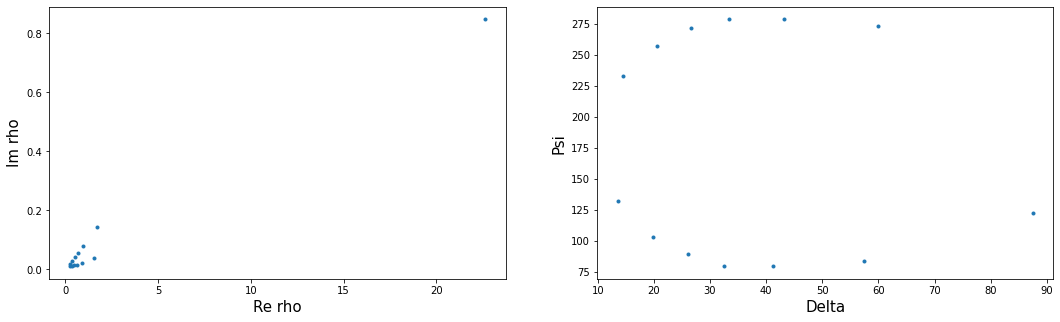

In [28]:
Psi_SiO2onSi = [13.56,19.77,26.09, 32.41, 41.26, 57.36, 87.47,60.00,43.10,33.33,26.67,20.57,14.48]
Delta_SiO2onSi =[132.09,103.60,89.35,79.64,80.29,84.17,123.02,273.24,278.42,278.42,271.29,257.05,233.09]
Psi = np.array(Psi_SiO2onSi, dtype=float)
Delta = np.array(Delta_SiO2onSi, dtype=float)

rho = np.tan(np.radians(Psi))*np.exp(1j*np.radians(Delta*np.pi/180))

plt.subplot(1,2,1)
plt.xlabel('Re rho', fontsize=15)
plt.ylabel('Im rho', fontsize=15)
plt.rcParams['figure.figsize'] = [18, 5]
plt.plot(rho.real,rho.imag,".")
plt.subplot(1,2,2)
plt.ylabel('Psi', fontsize=15)
plt.xlabel('Delta', fontsize=15)
plt.rcParams['figure.figsize'] = [18, 5]
plt.plot(Psi,Delta,".")